# Discretizacion segundo orden

Para el sistema $$s^2 x + 2\zeta\omega sx + \omega^2 x = K \omega^2 u  $$
con $T_s$ tiempo entre muestras. 

El sistema discretizado es de la forma:
$$x[k+2] = a_1 x[k+1] + a_0 x[k] + b_0 u[k]$$

con:
* $a_1 = 2(1 - \zeta\omega T_s) $
* $a_0 = -1 +2\zeta\omega T_s - \omega^2 T_s^2$
* $b_0 = K \omega^2 T_s^2$


y a la inversa:
* $ \omega = \frac {\sqrt{1-a_0-a_1}}  {T_s}$
* $ \zeta = (1 - \frac{a_1}{2}) \frac{1}{\omega T_s}$
* $ K = \frac{b_0}{\omega^2 T_s^2}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
N = 100
t = np.arange(0,N)

In [119]:
# sistema segundo orden
def get_a1_a0_b0(sigma, omega, K, Ts):
    a_1 = 2*(1-sigma * omega * Ts)
    a_0 = -1 +2*sigma*omega*Ts - (omega*Ts)**2
    b_0 = K * (omega*Ts)**2
    return a_1, a_0, b_0

def get_sigma_omega_K(a_1, a_0, b_0, Ts):
    omega = np.sqrt(1-a_0-a_1)/Ts
    sigma = (1-a_1/2)*1/(omega*Ts)
    K = b_0/(omega*Ts)**2
    return sigma, omega, K

In [120]:
# sistema segundo orden
sigma = 0.4
omega = 2*np.pi*10
K = 0.8
print('{}={:.3f}'.format('omega', omega))
a_1, a_0, b_0 = get_a1_a0_b0(sigma, omega, K, Ts)
print('{}= {:+.3f}'.format('a_1 ', a_1))
print('{}= {:+.3f}'.format('a_0 ', a_0))
print('{}= {:+.3f}'.format('b_0 ', b_0))


omega=62.832
a_1 = +1.497
a_0 = -0.892
b_0 = +0.316


In [121]:
#comprobacion
sigma_b, omega_b, K_b = get_sigma_omega_K(a_1, a_0, b_0, Ts)
print('sigma_b=',sigma_b)
print('omega_b=',omega_b)
print('K_b=',K_b)

sigma_b= 0.40000000000000013
omega_b= 62.83185307179585
K_b= 0.8000000000000003


In [122]:
# simulacion escalon
x = np.zeros(N)
u = np.ones(N)
for k in range (0,N-2):
    x[k+2] = a_1 * x[k+1] + a_0 * x[k] + b_0 * u[k]

Text(0, 0.5, 'amplitude')

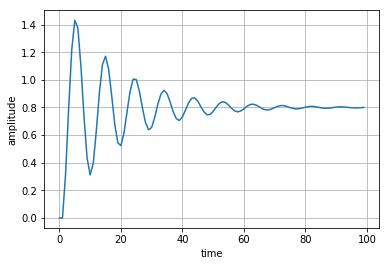

In [123]:
plt.plot(t,x)
plt.grid()
plt.xlabel('time')
plt.ylabel('amplitude')
#plt.xlim(0,0.1)